# ĐỒ ÁN THỰC HÀNH CUỐI KÌ

## MÔN LẬP TRÌNH CHO KHOA HỌC DỮ LIỆU

**Thành viên:**
- Phạm Trần Gia Phú
- Nguyễn Anh Tuấn
- Phạm Khánh Hoàng Việt
- Đinh Thị Hoàng Linh

#### Mô tả dataset
Bạn có bao giờ thắc mắc những thành phần nào có trong mỹ phẩm yêu thích của mình không? 

Bạn có biết rằng có hơn 12.000 hóa chất được sử dụng trong mỹ phẩm và các sản phẩm chăm sóc cá nhân? 

Bộ dữ liệu này chứa thông tin về các hóa chất được sử dụng trong mỹ phẩm, bao gồm tên của hóa chất, công ty sản xuất hóa chất đó, danh mục chính mà hóa chất được sử dụng và ngày báo cáo lần đầu tiên.

Vậy, những gì thực sự trong túi trang điểm của bạn? 
Hãy cùng nhau xem qua một số thành phần của các loại mỹ phẩm phổ biến nhất

#### Cài đặt thư viện

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Phần 1. Khám phá dữ liệu (kết hợp tiền xử lý)

Đọc dữ liệu từ dataset vào dataframe

In [18]:
df = pd.read_csv("./dataset/chemicals-in-cosmetics-3.csv")
df

,index,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),...,13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),...,65996-92-1,4,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),...,140-67-0,5,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),...,13463-67-7,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),...,13463-67-7,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114293,114293,41445,JILLSTUART Something Pure Blue Diamond Glaze L...,NaN,NaN,1031,"KOS� America, Inc.",JILL STUART,44,Makeup Products (non-permanent),...,13463-67-7,67901,Titanium dioxide,04/30/2020,04/30/2020,NaN,04/30/2020,04/30/2020,NaN,1
114294,114294,41446,JILLSTUART something pure blue my lips,NaN,NaN,1031,"KOS� America, Inc.",JILL STUART,44,Makeup Products (non-permanent),...,13463-67-7,67902,Titanium dioxide,04/30/2020,04/30/2020,NaN,04/30/2020,04/30/2020,NaN,1
114295,114295,41449,SPRING BLOSSOM VANILLA APPLE BODY WASH,NaN,NaN,1388,Cosmopharm Ltd.,Careline,6,Bath Products,...,NaN,67905,Cocamide DEA,04/30/2020,04/30/2020,NaN,04/30/2020,04/30/2020,NaN,1
114296,114296,41450,Wild Breeze Water Lilies Hand Soap,NaN,NaN,1388,Cosmopharm Ltd.,Careline,6,Bath Products,...,NaN,67906,Cocamide DEA,04/30/2020,04/30/2020,NaN,04/30/2020,04/30/2020,NaN,1


(114298, 23)

**MỖI CỘT CÓ Ý NGHĨA GÌ**

- **CDPHId**: The California Department of Public Health (CDPH) internal identification number for product. Note that the CDPHId may appear more than once if a product has more than one Color/Scent/Flavor, more than one Category, or more than one Chemical Name/CAS number reported. (float)
- **ProductName**: The name of the product in which the chemical is used. (String)
- **CSF**: The Cosmetic Safety Factor, a measure of the safety of a chemical used in cosmetics. (Float)
- **CompanyName**: The name of the company that manufactures the product in which the chemical is used. (String)
- **BrandName**: The name of the brand of the product in which the chemical is used. (String)
- **PrimaryCategory**: The primary category of cosmetic in which the chemical is used. (String)
- **SubCategory**: The subcategory of cosmetic in which the chemical is used. (String)
- **CasNumber**: The CAS Number of the chemical. (String)
- **ChemicalName**: The name of the chemical. (String)
- **InitialDateReported**: The date the chemical was first reported. (Date)
- **MostRecentDateReported**: The date the chemical was most recently reported. (Date)
- **DiscontinuedDate**: The date the product in which the chemical is used was discontinued. (Date)
- **ChemicalCreatedAt**: The date the chemical was created. (Date)
- **ChemicalUpdatedAt**: The date the chemical was last updated. (Date)
- **ChemicalDateRemoved**: The date the chemical was removed from the product. (Date)
- **ChemicalCount**: The number of chemicals in the product. (Integer)

#### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [6]:
df.dtypes

index                       int64
CDPHId                      int64
ProductName                object
CSFId                     float64
CSF                        object
CompanyId                   int64
CompanyName                object
BrandName                  object
PrimaryCategoryId           int64
PrimaryCategory            object
SubCategoryId               int64
SubCategory                object
CasId                       int64
CasNumber                  object
ChemicalId                  int64
ChemicalName               object
InitialDateReported        object
MostRecentDateReported     object
DiscontinuedDate           object
ChemicalCreatedAt          object
ChemicalUpdatedAt          object
ChemicalDateRemoved        object
ChemicalCount               int64
dtype: object

#### Chuyển các cột  **'InitialDateReported'** , **'MostRecentDateReported'** , **'DiscontinuedDate'** , **'ChemicalCreatedAt'** , **'ChemicalUpdatedAt'** , **'ChemicalDateRemoved'** về dạng datetime

In [7]:
df[['InitialDateReported',
    'MostRecentDateReported',   
    'DiscontinuedDate', 
    'ChemicalCreatedAt',    
    'ChemicalUpdatedAt',    
    'ChemicalDateRemoved']] = pd.to_datetime(df[['InitialDateReported',
                                                'MostRecentDateReported',   
                                                'DiscontinuedDate', 
                                                'ChemicalCreatedAt',    
                                                'ChemicalUpdatedAt',    
                                                'ChemicalDateRemoved']].stack()).unstack()

In [8]:
df[['InitialDateReported',
    'MostRecentDateReported',   
    'DiscontinuedDate', 
    'ChemicalCreatedAt',    
    'ChemicalUpdatedAt',    
    'ChemicalDateRemoved']].dtypes

InitialDateReported       datetime64[ns]
MostRecentDateReported    datetime64[ns]
DiscontinuedDate          datetime64[ns]
ChemicalCreatedAt         datetime64[ns]
ChemicalUpdatedAt         datetime64[ns]
ChemicalDateRemoved       datetime64[ns]
dtype: object

#### Tỉ lệ các giá trị thiếu với mỗi cột dạng numeric

In [9]:
def nan_percentage(column):
    print('Percentage of empty value in column ' + column + ':', df[column].isnull().sum() / len(df[column]))
nan_percentage('CSFId')
nan_percentage('CompanyId')
nan_percentage('PrimaryCategoryId')
nan_percentage('SubCategoryId')
nan_percentage('CasId')
nan_percentage('ChemicalId')
nan_percentage('ChemicalCount')

Percentage of empty value in column CSFId: 0.2967331011916219
Percentage of empty value in column CompanyId: 0.0
Percentage of empty value in column PrimaryCategoryId: 0.0
Percentage of empty value in column SubCategoryId: 0.0
Percentage of empty value in column CasId: 0.0
Percentage of empty value in column ChemicalId: 0.0
Percentage of empty value in column ChemicalCount: 0.0


Rất may là các cột numeric đều có mục đích định danh cho các chất hóa học, nên việc xem xét min/max của các giá trị trong các cột này là không cần thiết :v

#### Kiểm tra dữ liệu null

In [11]:
# tính số giá trị thiếu của cột s
def missing_num(s):
    return s.isnull().sum()

# Tính số tỉ lệ phần trăm giá trị thiếu của cột s 
def missing_ratio(s):
    return s.isnull().sum()/len(s)*100

# Tính số giá trị khác nhau (không tính giá trị thiếu) của cột s
def n_diff_vals(s):
    return s.dropna().unique().size

# Các giá trị khác nhau (không xét giá trị thiếu) của cột s
def diff_vals(s):
    return s.dropna().unique()

# Tên các cột thuộc kiểu dữ liệu dạng phân loại (category)
cate_index = ['ProductName', 'CSF', 'CompanyName', 'BrandName', 'PrimaryCategory',\
            'SubCategory', 'CasNumber', 'ChemicalName']

cate_columns = ['missing_num','missing_ratio', 'n_diff_vals', 'diff_vals']

cate_data = np.array([[
                missing_num(df[i]),
                missing_ratio(df[i]),
                n_diff_vals(df[i]),
                diff_vals(df[i]),
            ] for i in cate_index], dtype = object)

cate_col_profiles_df = pd.DataFrame(data=cate_data, columns=cate_columns, index=cate_index)

In [12]:
cate_col_profiles_df

,missing_num,missing_ratio,n_diff_vals,diff_vals
ProductName,0,0.0,33638,[ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHA...
CSF,34340,30.04427,34258,"[5858-81-1, D&C RED 7 CALCIUM LAKE, D&C RED 28..."
CompanyName,0,0.0,606,"[New Avon LLC, J. Strickland & Co., OPI PRODUC..."
BrandName,216,0.18898,2711,"[AVON, Glover's, OPI, ABSOLUTE, ABSOLUTE FX, G..."
PrimaryCategory,0,0.0,13,"[Makeup Products (non-permanent), Hair Care Pr..."
SubCategory,0,0.0,89,"[Lip Color - Lipsticks, Liners, and Pencils, H..."
CasNumber,6396,5.595898,125,"[13463-67-7, 65996-92-1, 140-67-0, 68603-42-9,..."
ChemicalName,0,0.0,123,"[Titanium dioxide, Distillates (coal tar), Est..."


<br>Số lượng giá trị thiếu (missing_num)
- Có 34340 dòng bị mất giá trị ở cột 'CSF'
- Có 216 dòng bị mất giá trị ở cột 'BrandName'
- Có 6396 dòng bị mất giá trị ở cột 'CasNumber'

<br>Tỉ lệ phần trăm giá trị thiếu (missing_ratio)
- Có 30% dòng bị mất giá trị ở cột 'CSF'
- Có 0.2% dòng bị mất giá trị ở cột 'BrandName'
- Có 5.6% dòng bị mất giá trị ở cột 'CasNumber'


### Phần 2. Trả lời câu hỏi

#### Câu 1: Top 10 các loại hoá chất được sử dụng nhiều nhất 

In [13]:
df['ChemicalName'].value_counts()

Titanium dioxide                                                                                       93252
Silica, crystalline (airborne particles of respirable size)                                             2742
Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.     2154
Mica                                                                                                    1911
Butylated hydroxyanisole                                                                                1888
                                                                                                       ...  
Acetylsalicylic acid                                                                                       1
2-Propyleneacrolein                                                                                        1
Spironolactone                                                                                             1
Extract of coffee b

In [14]:
top10_chems = df['ChemicalName'].value_counts().to_frame('counts').head(10)
top10_chems

,counts
Titanium dioxide,93252
"Silica, crystalline (airborne particles of respirable size)",2742
"Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.",2154
Mica,1911
Butylated hydroxyanisole,1888
Carbon black,1753
Talc,1534
Cocamide diethanolamine,1397
Retinyl palmitate,1181
Vitamin A palmitate,971


<AxesSubplot: xlabel='Số lượng sử dụng', ylabel='Loại hoá chất'>

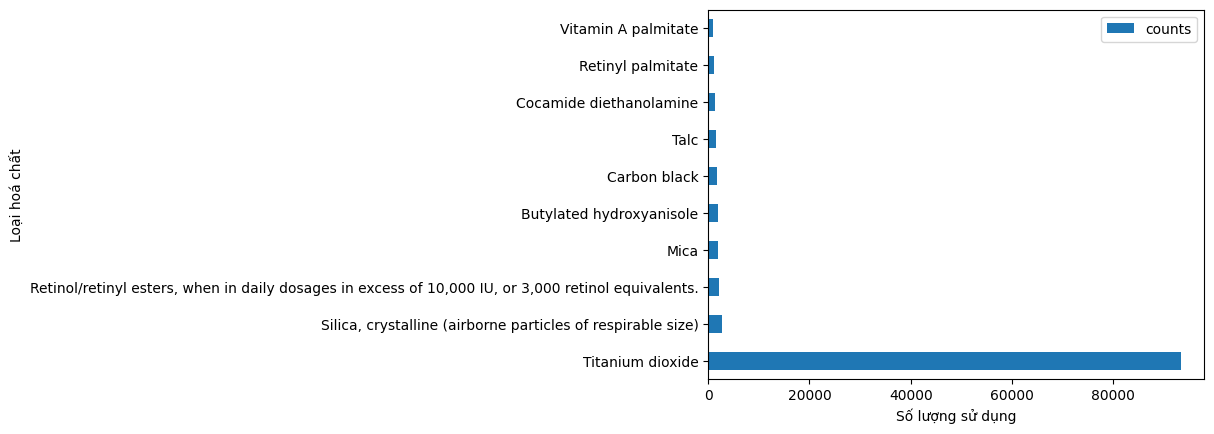

In [16]:
top10_chems.plot.barh(ylabel='Loại hoá chất',xlabel='Số lượng sử dụng')

- Có thể thấy Titanium dioxide được sử dụng rất nhiều, có thể là hầu hết trong các loại mỹ phẩm hiện nay.